<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Measuring_Monotonic_Relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import yfinance as yf

In [4]:
l = [10, 9, 5, 7, 5]
print(f'Raw data: {l}')
print(f'Ranking: {list(stats.rankdata(l, method="average"))}')

Raw data: [10, 9, 5, 7, 5]
Ranking: [5.0, 4.0, 1.5, 3.0, 1.5]


## Spearman Rank Correlation

In [5]:
## Experiment

n = 100
def compare_correlation_and_spearman_rank(n, noise):
    X = np.random.poisson(size=n)
    y = np.exp(X) + noise * np.random.normal(size=n)

    X_rank = stats.rankdata(X, method='average')
    y_rank = stats.rankdata(y, method='average')

    diffs = X_rank - y_rank
    r_s = 1 - 6 * sum(diffs * diffs) / (n * ((n ** 2) - 1))
    c_c = np.corrcoef(X, y)[0, 1]
    return r_s, c_c

In [6]:
experiments = 1000
spearman_dist = np.ndarray(experiments)
correlation_dist = np.ndarray(experiments)

for i in range(experiments):
    r_s, c_c = compare_correlation_and_spearman_rank(n, 1.0)
    spearman_dist[i] = r_s
    correlation_dist[i] = c_c

print(f'Spearman Rank Coefficient: {np.mean(spearman_dist):0.4f}')
print(f'Correlation Coefficient: {np.mean(correlation_dist):0.4f}')

Spearman Rank Coefficient: 0.8763
Correlation Coefficient: 0.7688


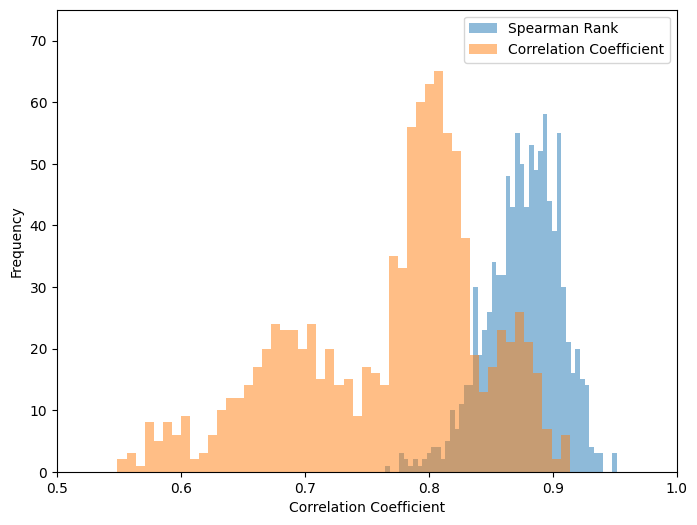

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(spearman_dist, bins=50, alpha=0.5)
ax.hist(correlation_dist, bins=50, alpha=0.5)
ax.legend(['Spearman Rank', 'Correlation Coefficient'])
ax.set(
    xlabel='Correlation Coefficient',
    ylabel='Frequency',
    ylim=[0, 75],
    xlim=[0.5, 1]
)

plt.show()

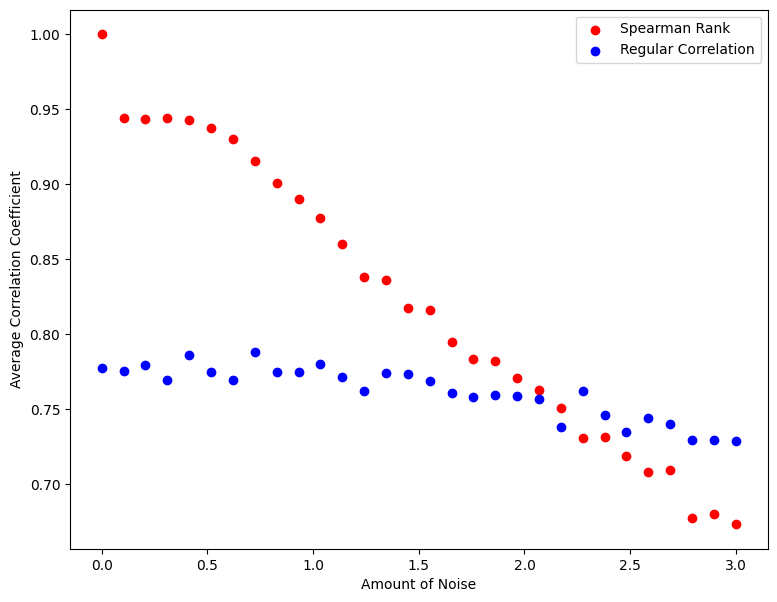

In [9]:
# Spearman rank and regular with more noise

n = 100
noises = np.linspace(0, 3, 30)
experiments = 100
spearman = np.ndarray(len(noises))
correlation = np.ndarray(len(noises))

for i in range(noises.shape[0]):
    rank_coef = 0.0
    corr_coef = 0.0
    noise = noises[i]
    for j in range(experiments):
        r_s, c_c = compare_correlation_and_spearman_rank(n, noise)
        rank_coef += r_s
        corr_coef += c_c
    spearman[i] = rank_coef / experiments
    correlation[i] = corr_coef / experiments

fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(noises, spearman, color='r', label='Spearman Rank')
ax.scatter(noises, correlation, color='b', label='Regular Correlation')
ax.set(
    xlabel='Amount of Noise',
    ylabel='Average Correlation Coefficient',
)
ax.legend()
plt.show()

In [12]:
# Delay in correlation
n = 100
X = np.random.rand(n)
X_rank = stats.rankdata(X, method='average')
lagged = [1, 1] + list(X[:(n - 2)])
y_rank = stats.rankdata(lagged, method='average')
diffs = X_rank - y_rank
r_s = 1 - 6*sum(diffs*diffs)/(n*(n**2 - 1))
print(r_s)

0.12342334233423347


## Built-in Function

In [13]:
np.random.seed(161)
X = np.random.rand(10)
y = np.random.rand(10)

r_s = stats.spearmanr(X, y)
print(f'Spearman Rank Coefficient: {r_s[0]}')
print(f'P-Value: {r_s[-1]}')

Spearman Rank Coefficient: 0.23636363636363633
P-Value: 0.5108853175152002


In [14]:
import pandas as pd

mutual_fund_data = pd.read_csv('/content/mutual_fund_data.csv')
expense = mutual_fund_data['Annual Expense Ratio'].values
sharpe = mutual_fund_data['Three Year Sharpe Ratio'].values

Spearman Rank Coef. : -0.2376
P-value: 0.0167


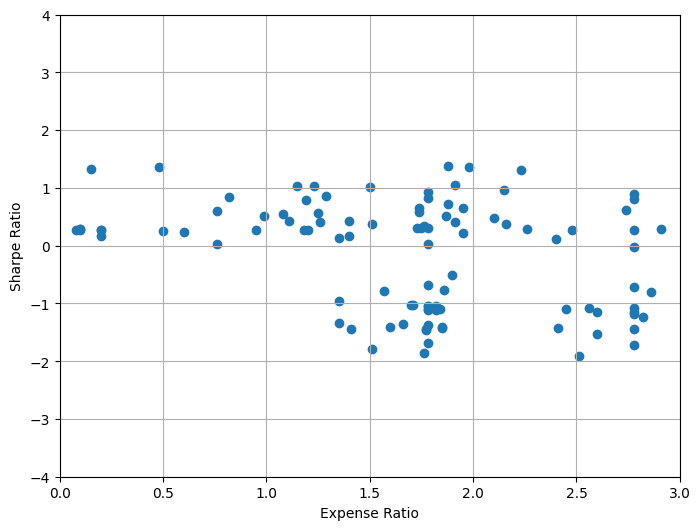

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(expense, sharpe)
ax.set(
    xlabel='Expense Ratio',
    ylabel='Sharpe Ratio',
    xlim=[0, 3],
    ylim=[-4, 4]
)
plt.grid()

r_s = stats.spearmanr(expense, sharpe)
print(f'Spearman Rank Coef. : {r_s[0]:0.4f}')
print(f'P-value: {r_s[1]:0.4f}')

## Real World Use Case

In [34]:
symbol_list = ['A', 'AA', 'AAC', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB']
start = '2014-12-01'
end = '2015-01-01'

returns = yf.download(symbol_list, start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%%**********************]  30 of 30 completed
ERROR:yfinance:
12 Failed downloads:
ERROR:yfinance:['ABDC', 'ABC', 'ABB', 'AAC', 'AAWW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['ABAC', 'ABCW', 'ABGB', 'AAV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-12-01 -> 2015-01-01)')
ERROR:yfinance:['AAVL', 'AAN', 'AAMC']: Exception("%ticker%: Data doesn't exist for startDate = 1417410000, endDate = 1420088400")


In [35]:
start = '2015-01-01'
end = '2015-02-01'
walk_forward_returns = yf.download(symbol_list, start=start, end=end)['Adj Close'].pct_change()[1:]
avg_walk_forward = np.mean(walk_forward_returns)

[*********************100%%**********************]  30 of 30 completed
ERROR:yfinance:
12 Failed downloads:
ERROR:yfinance:['ABDC', 'ABC', 'ABB', 'AAC', 'AAWW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['ABAC', 'ABCW', 'ABGB', 'AAV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2015-02-01)')
ERROR:yfinance:['AAVL', 'AAN', 'AAMC']: Exception("%ticker%: Data doesn't exist for startDate = 1420088400, endDate = 1422766800")


In [36]:
print(f'Returns\n')
print(f'{np.mean(returns, axis=0)}')

print(f'\nForward returns\n')
print(f'{np.mean(walk_forward_returns, axis=0)}')

Returns

Ticker
A      -0.000635
AA     -0.003676
AAC          NaN
AAL     0.005676
AAMC         NaN
AAME    0.002202
AAN          NaN
AAOI    0.004623
AAON    0.004212
AAP     0.003891
AAPL   -0.001875
AAT     0.001727
AAU    -0.004085
AAV          NaN
AAVL         NaN
AAWW         NaN
AB     -0.000934
ABAC         NaN
ABAX    0.000675
ABB          NaN
ABBV   -0.002466
ABC          NaN
ABCB    0.002256
ABCD   -0.000790
ABCO   -0.000838
ABCW         NaN
ABDC         NaN
ABEV    0.000034
ABG     0.000803
ABGB         NaN
dtype: float64

Forward returns

Ticker
A      -0.003591
AA     -0.000465
AAC          NaN
AAL    -0.004460
AAMC         NaN
AAME   -0.000413
AAN          NaN
AAOI   -0.009450
AAON   -0.000073
AAP     0.000255
AAPL    0.003927
AAT     0.005067
AAU     0.013053
AAV          NaN
AAVL         NaN
AAWW         NaN
AB     -0.003931
ABAC         NaN
ABAX    0.003483
ABB          NaN
ABBV   -0.004020
ABC          NaN
ABCB   -0.001970
ABCD    0.019792
ABCO    0.000528
ABCW     

In [39]:
np.mean(returns, axis=0).dropna(), np.mean(walk_forward_returns, axis=0).dropna()

(Ticker
 A      -0.000635
 AA     -0.003676
 AAL     0.005676
 AAME    0.002202
 AAOI    0.004623
 AAON    0.004212
 AAP     0.003891
 AAPL   -0.001875
 AAT     0.001727
 AAU    -0.004085
 AB     -0.000934
 ABAX    0.000675
 ABBV   -0.002466
 ABCB    0.002256
 ABCD   -0.000790
 ABCO   -0.000838
 ABEV    0.000034
 ABG     0.000803
 dtype: float64,
 Ticker
 A      -0.003591
 AA     -0.000465
 AAL    -0.004460
 AAME   -0.000413
 AAOI   -0.009450
 AAON   -0.000073
 AAP     0.000255
 AAPL    0.003927
 AAT     0.005067
 AAU     0.013053
 AB     -0.003931
 ABAX    0.003483
 ABBV   -0.004020
 ABCB   -0.001970
 ABCD    0.019792
 ABCO    0.000528
 ABEV    0.005777
 ABG    -0.001104
 dtype: float64)

In [40]:
scores = np.mean(returns, axis=0).dropna()
forward_scores = np.mean(walk_forward_returns, axis=0).dropna()

r_s = stats.spearmanr(scores, forward_scores)
print(f'Spearman Coef. : {r_s[0]:0.4f}')
print(f'P-Value: {r_s[1]:0.4f}')

Spearman Coef. : -0.3271
P-Value: 0.1851


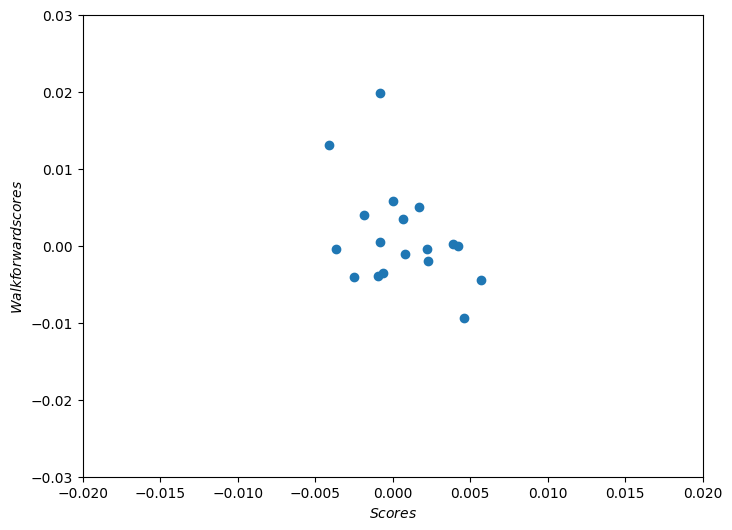

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(scores, forward_scores)
ax.set(
    xlabel='$Scores$',
    ylabel='$Walk forward scores$',
    xlim=[-0.02, 0.02],
    ylim=[-0.03, 0.03]
)
plt.show()